***

# Capstone Project

***

## Collision Data Inspection and Analysis, Cleanup, Model Building, Assessment and Interpretation

## Part 1 - Data Inspection and Analysis

***

### Pull in the data

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv( "Data-Collisions.csv", encoding='utf-8' )

C:\Users\gruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# First look at the dataset

dataset.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Based on the warning from when we read the data, column 33 (SPEEDING) is a 'mixed' type, so let's address that

In [3]:
# What values are there?

dataset[ 'SPEEDING' ].unique()

array([nan, 'Y'], dtype=object)

### OK, a 'Y' means speeding, it's blank if not which the read_csv has converted to a NaN. So a little manipulation to convert that field to 1s and 0s!

In [4]:
dataset['SPEEDING'] = dataset[ 'SPEEDING' ].map( { 'Y' : 1 } ).fillna(0)

In [5]:
# Since we're only interested in intersection data, cut the data back right now

dataset = dataset[ dataset.ADDRTYPE == 'Intersection']

print( dataset.shape )

(65070, 38)


In [6]:
# Now with that done let's take a look at some of the numerical details of this data

dataset.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SPEEDING,SEGLANEKEY,CROSSWALKKEY
count,65070.000000,64748.000000,64748.000000,65070.000000,65070.000000,65070.000000,65070.000000,65070.000000,65070.000000,65070.000000,65070.000000,65070.000000,65070.000000,3.729900e+04,65070.000000,65070.000000,6.507000e+04
mean,1.427524,-122.330274,47.622226,112007.559751,146575.658475,146812.308821,37558.450576,1.427524,2.571984,0.077670,0.048563,1.855279,13.675304,8.080278e+06,0.030152,452.021269,2.796963e+04
std,0.494723,0.028317,0.055691,63519.834795,89063.280106,89445.065377,51745.990273,0.494723,1.434564,0.280769,0.216238,0.567910,6.834578,2.587160e+06,0.171007,4876.173695,1.201447e+05
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001006e+06,0.000000,0.000000,0.000000e+00
25%,1.000000,-122.347374,47.583674,56714.500000,73215.500000,73215.500000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.049020e+06,0.000000,0.000000,0.000000e+00
50%,1.000000,-122.330229,47.616491,111426.000000,127954.500000,127954.500000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,8.077015e+06,0.000000,0.000000,0.000000e+00
75%,2.000000,-122.312515,47.665035,169099.250000,215489.250000,215749.250000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.022002e+07,0.000000,0.000000,0.000000e+00
max,2.000000,-122.241082,47.734141,219546.000000,331453.000000,332953.000000,757580.000000,2.000000,81.000000,4.000000,2.000000,10.000000,69.000000,1.307201e+07,1.000000,525241.000000,5.239700e+06


***
# Note a key aspect of this data is that while the severity code to be predicted in theory can be multiple values, in this particular case it is only 1 or 2, so that simplifies the approach to the models. Huzzah!
***

In [7]:
dataset['SEVERITYCODE'] = dataset.SEVERITYCODE - 1

dataset.SEVERITYCODE.describe()

count    65070.000000
mean         0.427524
std          0.494723
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SEVERITYCODE, dtype: float64

***
# The data here is overwhelmingly categorical (other than location X and Y). So here is a routine to help visualize the categorical data as a first step in cleaning it up.

#### (The routine is adapted from code in the scikit-learn documentation)
***

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotCategoricalHistogram(df, nHistogramShown, nHistogramPerRow):
    df = df.select_dtypes(exclude =[np.number]) # keep only non-numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')

    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        ax = plt.subplot(nHistRow, nHistogramPerRow, i+1)
        sns.countplot( x=columnNames[i], data=df, ax=ax )
#        df.iloc[:,i].hist()
#        plt.ylabel('counts')
#        plt.xticks(rotation=90)
#        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In C:\Users\gruno\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gruno\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gruno\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\gruno\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gruno\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# First look!

## Notice that I am converting the NaN fields into a string so that it can be displayed as such

C:\Users\gruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()


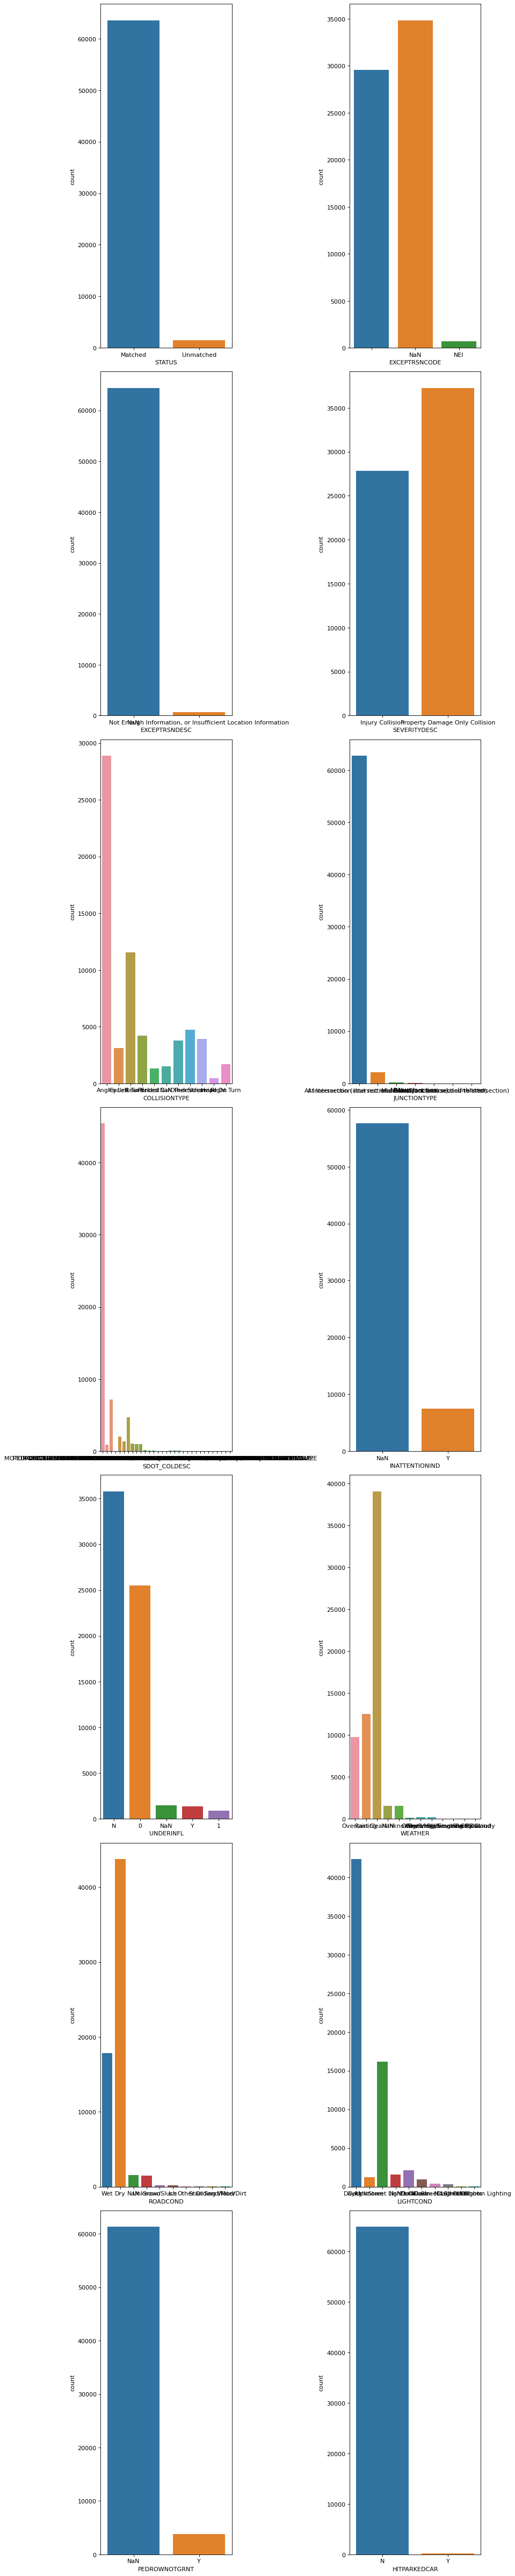

In [9]:
plotCategoricalHistogram( dataset.fillna('NaN'), 20, 2 )

## And now take a look at the correlations of the numeric fields

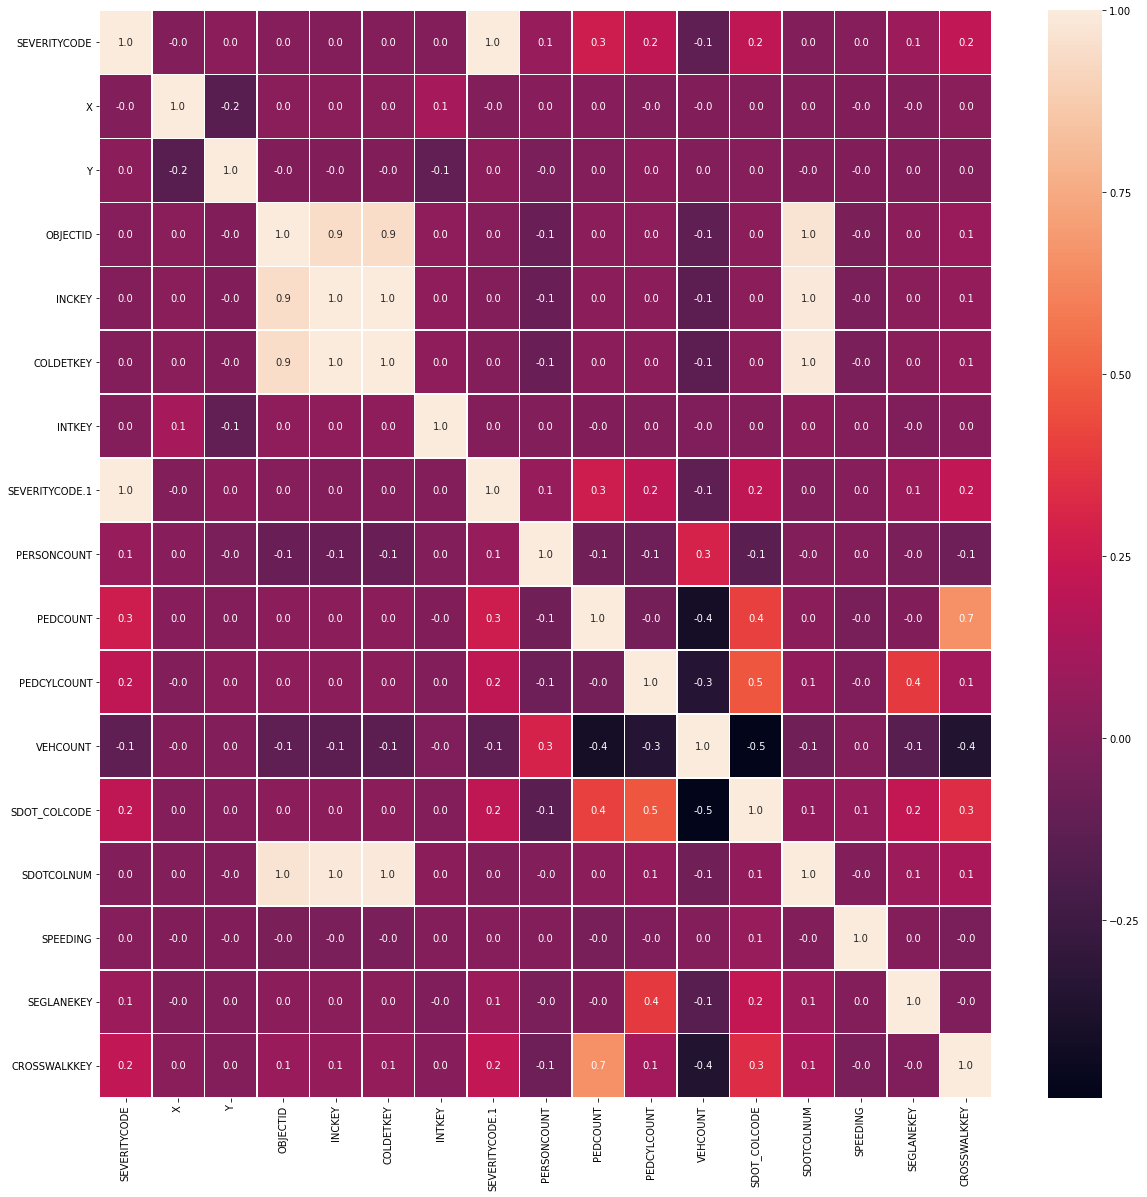

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Some Important Conclusions

## 1. Each of the categories needs cleaning, as a result of inconsistent nomenclature (e.g. using both 'Y' and '1'), or nan and 'Y'

## 2. Generally speaking, the data is reasonably well distributed, albeit with some heavy tendencies towards e.g. clear / dry / daylight

## 3. Other than a few key fields like VEHCOUNT, most of the numeric fields are not relevant.

## 4. In fact, clearly, lots of the data attributes are not useful for predictive purposes. Much of it is administrative record keeping.

### As noted in the associated data description, looking into the dataset description found here:

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

### and it's clear that most of the columns are not useful for our purposes, which is looking at intersection safety. So one important step to make the data more useful early on is to cut down to just the columns that are likely to influence intersection design. 

### Using both the documentation and the visualization, I have determined that these columns are (initially):

PEDCOUNT PEDCYLCOUNT VEHCOUNT INATTENTIONIND UNDERINFL WEATHER ROADCOND LIGHTCOND PEDROWNOTGRNT COLLISIONTYPE SPEEDING HITPARKEDCAR

***
## Part 2 - Data Cleanup
***

In [11]:
usefulcols = 'PEDCOUNT PEDCYLCOUNT VEHCOUNT INATTENTIONIND UNDERINFL COLLISIONTYPE WEATHER ROADCOND LIGHTCOND PEDROWNOTGRNT SPEEDING HITPARKEDCAR'.split()

# Save the target aka y before cutting the rest of the data down
y = dataset[ 'SEVERITYCODE' ]
dataset = dataset[ usefulcols ]

dataset.head()

,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,0,0,2,NaN,N,Angles,Overcast,Wet,Daylight,NaN,0.0,N
4,0,0,2,NaN,0,Angles,Raining,Wet,Daylight,NaN,0.0,N
5,0,0,2,NaN,N,Angles,Clear,Dry,Daylight,NaN,0.0,N
6,0,0,2,NaN,0,Angles,Raining,Wet,Daylight,NaN,0.0,N
7,0,1,1,NaN,N,Cycles,Clear,Dry,Daylight,NaN,0.0,N


In [12]:
dataset.dtypes

PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INATTENTIONIND     object
UNDERINFL          object
COLLISIONTYPE      object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING          float64
HITPARKEDCAR       object
dtype: object

# That's much more manageable and useful!

***

### The problem with categorical data

Most algorithms cannot actually handle string-based categorical data, so the first thing we have to do is *sensibly* convert the strings into numerical values or use a one-hot encoding.

In [13]:
# Loop through the columns and print out how many distinct values are found within

for col in dataset.columns:
    print( col, len(dataset[ col ].value_counts()) )

PEDCOUNT 5
PEDCYLCOUNT 3
VEHCOUNT 11
INATTENTIONIND 1
UNDERINFL 4
COLLISIONTYPE 10
WEATHER 11
ROADCOND 9
LIGHTCOND 9
PEDROWNOTGRNT 1
SPEEDING 2
HITPARKEDCAR 2


### All the column values are reasonably low, with a maximum of 11. (and that field is numeric)
### Pull columns with < 12 values and see if those are truly categorical. In this case, the code will pull all the columns, but this code exists in case the analysis changes and other columns with larger value counts are added).

In [14]:
# create a list of those columns with < 12 values

l12 = [ col for col in dataset.columns if len(dataset[ col ].value_counts()) < 12 ]
l12

['PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INATTENTIONIND',
 'UNDERINFL',
 'COLLISIONTYPE',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING',
 'HITPARKEDCAR']

In [15]:
# Inspect the data types of these categorical columns as well as taking a look at the data itself

datasettypes = dataset[ l12 ].dtypes
print( datasettypes )

dataset[ l12 ].head()

PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INATTENTIONIND     object
UNDERINFL          object
COLLISIONTYPE      object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING          float64
HITPARKEDCAR       object
dtype: object


,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,0,0,2,NaN,N,Angles,Overcast,Wet,Daylight,NaN,0.0,N
4,0,0,2,NaN,0,Angles,Raining,Wet,Daylight,NaN,0.0,N
5,0,0,2,NaN,N,Angles,Clear,Dry,Daylight,NaN,0.0,N
6,0,0,2,NaN,0,Angles,Raining,Wet,Daylight,NaN,0.0,N
7,0,1,1,NaN,N,Cycles,Clear,Dry,Daylight,NaN,0.0,N


### Isolate the true categorical columns and clean each of them up as appropriate

In [16]:
true_categorical_columns = [ col for col in l12 if datasettypes[col] not in [ np.int64, np.float64 ] ]
dataset[ true_categorical_columns ].head()

,INATTENTIONIND,UNDERINFL,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,HITPARKEDCAR
0,NaN,N,Angles,Overcast,Wet,Daylight,NaN,N
4,NaN,0,Angles,Raining,Wet,Daylight,NaN,N
5,NaN,N,Angles,Clear,Dry,Daylight,NaN,N
6,NaN,0,Angles,Raining,Wet,Daylight,NaN,N
7,NaN,N,Cycles,Clear,Dry,Daylight,NaN,N


***

# Here is where the data gets cleaned, and prepped for modelling, based on inspection and analysis from above

***

In [17]:
# As with SPEEDING which we dealt with initially, INATTENTIONID is a mix of 'Y' and nan
dataset['INATTENTIONIND'] = dataset[ 'INATTENTIONIND' ].map( { 'Y' : 1 } ).fillna(0)

# UNDERINFL is similar, it is a TRUE/FALSE, but way messier with 'N', '0', nan, 'Y', and '1'
dataset['UNDERINFL'] = dataset[ 'UNDERINFL' ].map( { 'N' : 0, '0' : 0, 'Y' : 1, '1' : 1 } ).fillna(0)

# Weather is a list of different weather types, so we'll have to do a one hot encoding
dataset = pd.concat( [ dataset, pd.get_dummies( dataset[ ['WEATHER'] ] ) ], axis=1 )
# drop the original WEATHER plus the non useful WEATHER_Unknown column
dataset.drop( [ 'WEATHER', 'WEATHER_Unknown' ], axis=1, inplace=True )

# same thing for road conditions - go one hot
dataset = pd.concat( [ dataset, pd.get_dummies( dataset[ ['ROADCOND'] ] ) ], axis=1 )
# drop the original plus the non useful Unknown column
dataset.drop( [ 'ROADCOND', 'ROADCOND_Unknown' ], axis=1, inplace=True )

# and again for light conditions! - go one hot
# however, this field also has some messiness in that it has a nan value, Unknown, and Other
# get_dummies ignores the nan values and drops them automatically, so we just have to deal with the other two
dataset = pd.concat( [ dataset, pd.get_dummies( dataset[ ['LIGHTCOND'] ] ) ], axis=1 )
# drop the original plus the two non useful columns
dataset.drop( [ 'LIGHTCOND', 'LIGHTCOND_Unknown', 'LIGHTCOND_Other' ], axis=1, inplace=True )

# same thing for collision type as for light conditions - go one hot, drop Other
dataset = pd.concat( [ dataset, pd.get_dummies( dataset[ ['COLLISIONTYPE'] ] ) ], axis=1 )
# However, we will also drop "Pedestrian" and "Cycle" as a type because that's already 
# in the pedestrian and cycle count attribute
dataset.drop( [ 'COLLISIONTYPE', 'COLLISIONTYPE_Other', 'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Cycles' ], axis=1, inplace=True )

# PEDROWNOTGRNT (pedestrian right of way granted) is a mix of 'Y' and nan just like the earlier few
dataset['PEDROWNOTGRNT'] = dataset[ 'PEDROWNOTGRNT' ].map( { 'Y' : 1 } ).fillna(0)

# And finally we have HITPARKED CAR, which is a simple Y or N which we'll convert to 1 or 0
dataset['HITPARKEDCAR'] = dataset[ 'HITPARKEDCAR' ].map( { 'N' : 0, 'Y' : 1 } )

# And here we have, in all its glory, the cleaned up dataset!

In [18]:
dataset.head()

,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,COLLISIONTYPE_Angles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,0,0,2,0.0,0.0,0.0,0.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,2,0.0,0.0,0.0,0.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,0,0,2,0.0,0.0,0.0,0.0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
6,0,0,2,0.0,0.0,0.0,0.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,0,1,1,0.0,0.0,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [19]:
# This should no longer show anything because we've converted all the labels into numeric quantities
# or into one hot columns
# but check just to be sure
plotCategoricalHistogram( dataset, 20, 2 )

<Figure size 960x320 with 0 Axes>

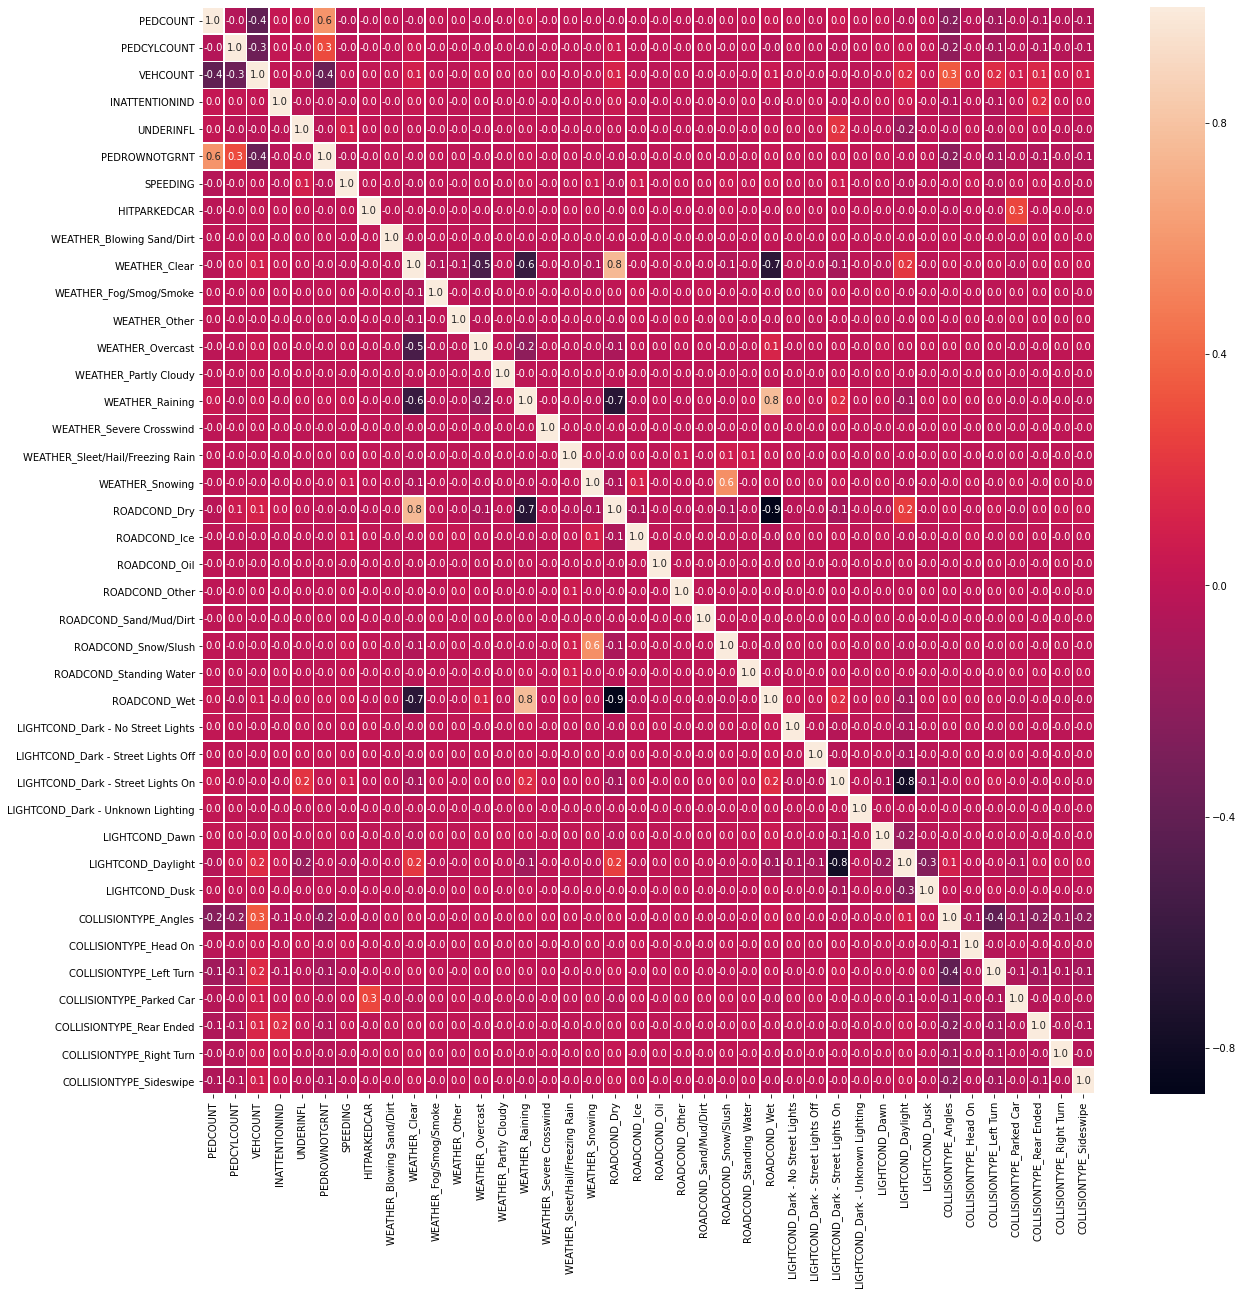

In [20]:
# Now double check the correlations of the numeric fields to make sure there is nothing untoward.

# Unsurprisingly, there are fairly high correlations between clear weather and dry roads, or rain and wet
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

***
## And last but definitely not least - split the data into training and test sets

### We have lots of data so split out 20% for the test set
***

In [21]:
#For the purposes of clarity, I'm importing libraries and functions close to where needed.
# Will leave it as acknowledged that proper Python form is that all imports go at the top of script!
from sklearn.model_selection import train_test_split

# Remember that we saved y earlier
X_train, X_test, y_train, y_test = train_test_split( dataset, y, test_size=0.2, random_state=0 )

print( X_train.shape, X_test.shape )
X_train.head()

(52056, 40) (13014, 40)


,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,...,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,COLLISIONTYPE_Angles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
164649,0,0,2,0.0,0.0,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2961,0,0,2,0.0,0.0,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
69074,0,0,2,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
170465,0,0,2,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
123983,0,0,2,0.0,0.0,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


***
# At long last!

## The data is ready to go! We are ready to build some machine learning models!
***

## Part 3 - Model Building

***

# Below is the confusion matrix plotting routine

## This is not exactly the same as the one from previous labs, it is modified from the scikit-learn documentation

In [22]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score

from sklearn import tree

%matplotlib inline

def plotConfusionMatrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    This is different from the ones we used in prevoius workshops, I adapted 
    this from the scikit-learn documentation
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


***
***

# For the purposes of this project, I'm going to use Decision Tree, Logistic Regression, and Random Forest for the algorithms

***
***

## Assessment metrics will be jaccard score, accuracy score, and weighted average f1 score

***
### Decision Tree
***

Jaccard score is 0.3
Accuracy score is 67.5%
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      7483
           1       0.77      0.33      0.46      5531

    accuracy                           0.67     13014
   macro avg       0.71      0.63      0.62     13014
weighted avg       0.70      0.67      0.64     13014

Confusion matrix, without normalization
[[6947  536]
 [3694 1837]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

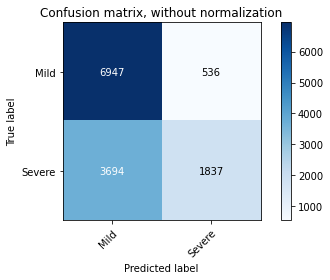

In [23]:
model1 = tree.DecisionTreeClassifier()
model1.fit( X_train, y_train )

y_pred = model1.predict( X_test )

js = jaccard_score(y_test, y_pred)
print( f'Jaccard score is {js:.1f}' )
print( f'Accuracy score is {100*metrics.accuracy_score( y_test, y_pred ):.1f}%' )
print( metrics.classification_report(y_test, y_pred) )

plotConfusionMatrix(y_test, y_pred, [ "Mild", "Severe"],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

***
### Random Forest
***

Jaccard score is 0.31
Accuracy score is 67.5%
              precision    recall  f1-score   support

           0       0.65      0.92      0.77      7483
           1       0.77      0.34      0.47      5531

    accuracy                           0.67     13014
   macro avg       0.71      0.63      0.62     13014
weighted avg       0.70      0.67      0.64     13014

Confusion matrix, without normalization
[[6917  566]
 [3670 1861]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

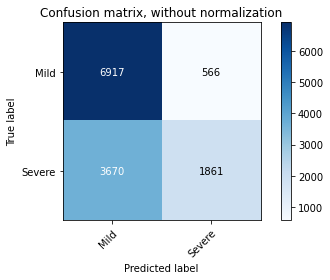

In [24]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier( n_estimators=50 )
model2.fit( X_train, y_train )
y_pred = model2.predict( X_test )

js = jaccard_score(y_test, y_pred)
print( f'Jaccard score is {js:.2f}' )

print( f'Accuracy score is {100*metrics.accuracy_score( y_test, y_pred ):.1f}%' )
print( metrics.classification_report(y_test, y_pred) )

plotConfusionMatrix(y_test, y_pred, [ "Mild", "Severe"],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

***
### Logistic Regression
***

C:\Users\gruno\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Jaccard score is 0.27
Accuracy score is 67.8%
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      7483
           1       0.87      0.29      0.43      5531

    accuracy                           0.68     13014
   macro avg       0.76      0.63      0.60     13014
weighted avg       0.74      0.68      0.63     13014

Confusion matrix, without normalization
[[7242  241]
 [3947 1584]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

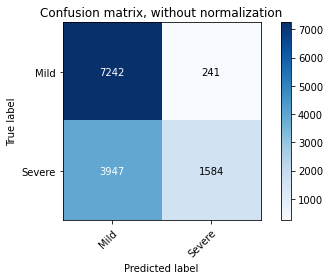

In [25]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression( solver='lbfgs' )
model3.fit( X_train, y_train )
y_pred = model3.predict( X_test )

js = jaccard_score(y_test, y_pred)
print( f'Jaccard score is {js:.2f}' )

print( f'Accuracy score is {100*metrics.accuracy_score( y_test, y_pred ):.1f}%' )
print( metrics.classification_report(y_test, y_pred) )

plotConfusionMatrix(y_test, y_pred, [ "Mild", "Severe"],
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

***
# Part 4 - Assessment and Interpretation
***

### Remember that the original purpose of this modeling exercise is to look at predictors of collision severity in order to improve intersection safety.

### To do this, we have to look at *feature importance* as the key measure. The features that more strongly predict the severity of collisions are the ones that need to be looked at.

## Since it turns out that all of the algorithms performed similarly (and adequately), we'll use the Decision Tree classifier because it has the handy capability of already having a characteristic called feature importance.

# Let's look!

In [26]:
important = model1.feature_importances_
# summarize feature importance
for col, val in zip(dataset.columns, important):
    print( '%40s\t%.4f' % ( col, val ) )

                                PEDCOUNT	0.3601
                             PEDCYLCOUNT	0.2471
                                VEHCOUNT	0.0583
                          INATTENTIONIND	0.0169
                               UNDERINFL	0.0126
                           PEDROWNOTGRNT	0.0023
                                SPEEDING	0.0144
                            HITPARKEDCAR	0.0020
               WEATHER_Blowing Sand/Dirt	0.0004
                           WEATHER_Clear	0.0102
                  WEATHER_Fog/Smog/Smoke	0.0029
                           WEATHER_Other	0.0033
                        WEATHER_Overcast	0.0117
                   WEATHER_Partly Cloudy	0.0002
                         WEATHER_Raining	0.0083
                WEATHER_Severe Crosswind	0.0002
        WEATHER_Sleet/Hail/Freezing Rain	0.0016
                         WEATHER_Snowing	0.0015
                            ROADCOND_Dry	0.0082
                            ROADCOND_Ice	0.0023
                            ROADCOND_Oil

### Plot it as a bar chart so it's a little more clear

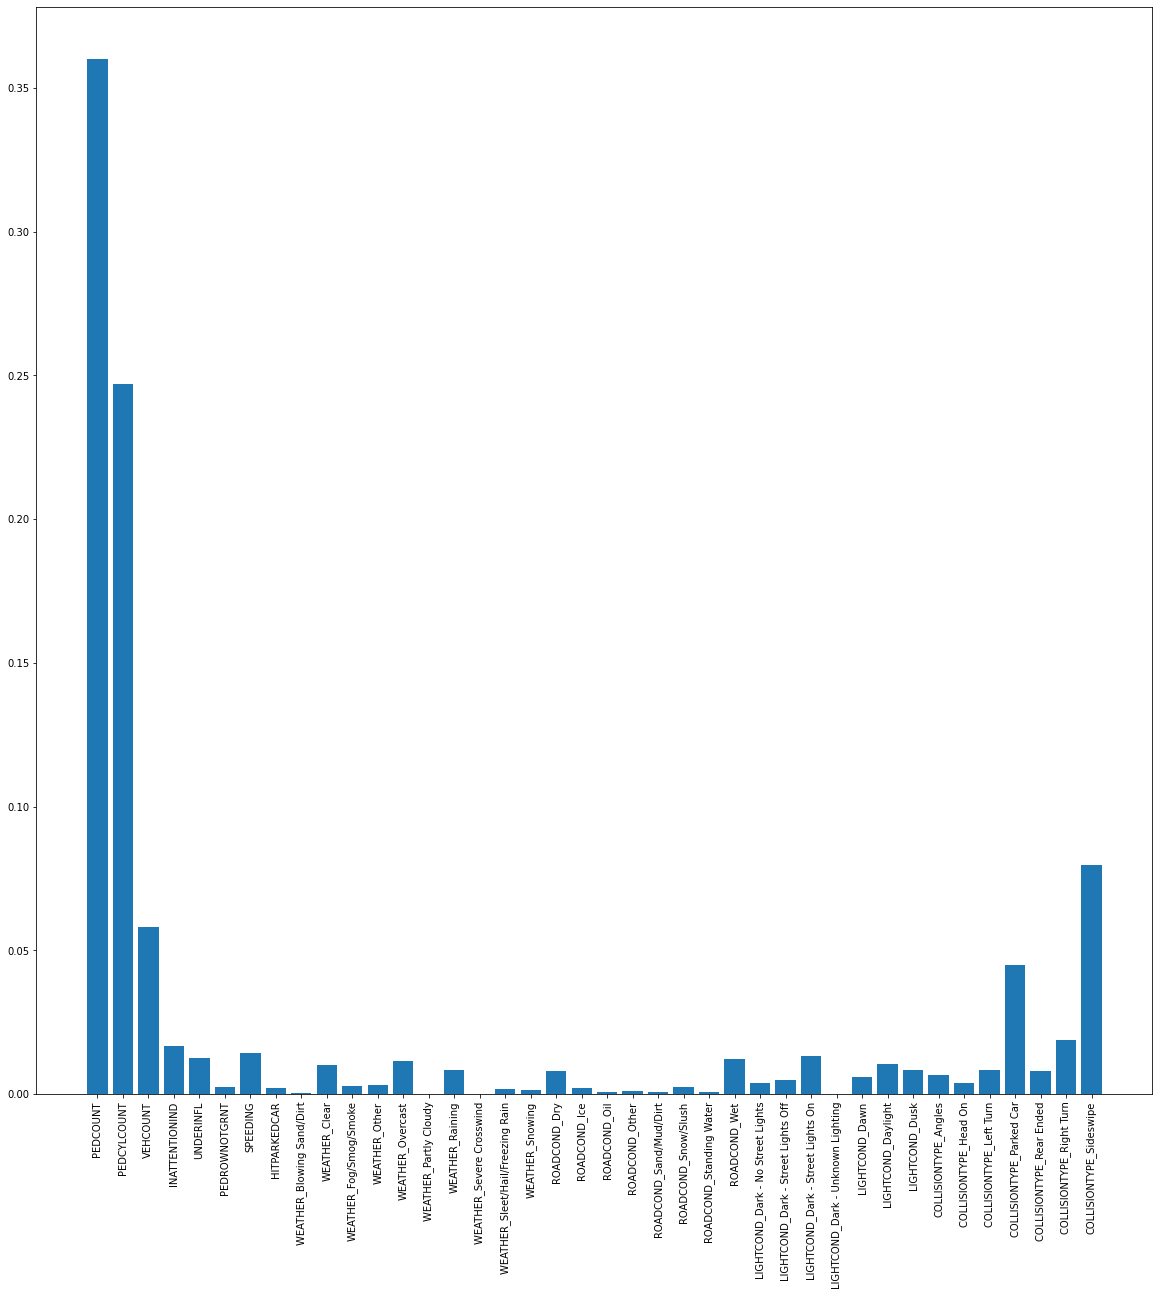

In [27]:
plt.figure( figsize=(20,20) )
plt.xticks(rotation='vertical')
plt.bar( list(range(len(important))), important, tick_label=dataset.columns )
plt.show()

***

# CONCLUSION

We can conclude that there are five features that stand out for predicting collision severity at intersections:

1. Pedestrian(s) present
2. Bicyclist(s) present
3. Number of vehicles involved
4. Presence of parked cars
5. Sideswipe style collisions

***
